##### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 2: Sentiment Classification of Tweets

This is a sample code to assist you with vectorising the 'Train' dataset for your assignment 2.

First we read the CSV datafiles (Train and Test).

In [1]:
import pandas as pd

train_data = pd.read_csv("Train.csv", sep=',')
test_data = pd.read_csv("Test.csv", sep=',')

Then we separate the tweet text and the label (sentiment). 

In [2]:
#separating instance and label for Train
X_train_raw = [x[0] for x in train_data[['text']].values]
Y_train = [x[0] for x in train_data[['sentiment']].values]

#check the result
print("Train length:",len(X_train_raw))

#separating instance and label for Test
X_test_raw = [x[0] for x in test_data[['text']].values]
X_test_id = [x[0] for x in test_data[["id"]].values]
#check the result
print("Test length:",len(X_test_raw))

Train length: 21802
Test length: 6099


In [3]:
#Let's see one example tweet
print(X_train_raw[1])

 is anybody going to the radio station tomorrow to see shawn? me and my friend may go but we would like to make new friends/meet there (:	


In [4]:
#text-preprocessing
#retweet, repeatd tweet--Go

import string
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import contractions
import unidecode
import numpy as np
#remove username---GO
#Twitter only allows alphanumeric handles and so [\w] works as a better regex for this task.
def remove_username(text):
    result = re.sub('@[\w]+','',text)
    return result

#remove url
def remove_url(text):
    result = re.sub(r'http\S+', '', text)
    return result


#remove punctuation---"!,.?"...
#also remove emoticons-----GO
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#Lowering the text---lowercase
def text_lower(text):
    return text.lower()

#expand contractions
def expand_contraction(text):
    return contractions.fix(text)

#tokonization---split the text
def tokenization(text):
    tokens = re.split("\W", text)
    #delete extra space in text
    tokens = [word for word in tokens if word!= ""]
    return tokens

#remove digits and words with digits----GO(from resource)
def remove_digit_word(text):
    result = [word for word in text if not any(c.isdigit() for c in word)]
    return result

#convert "café" to "cafe"
def convert_to_ASCII_characters(text):
    convertion = [unidecode.unidecode(word) for word in text]
    return convertion

#remove repeated letters in string---GO----huuuungry
def remove_repeated_letters(text):
    result = [re.sub(r"(.)\1{2,}", r"\1"*2, word) for word in text]
    return result

#remove stopwords from the tokenized text----remove commonly used word such as("an","a","in","on")
#however we have to remain "not", it might have relation with the negative sentement
def remove_stopwords(text):
    negative_stopwords = ["not","nor","never"]
    stopwords = nltk.corpus.stopwords.words('english')
    output = [i for i in text if i not in stopwords or i in negative_stopwords]
    return output

#Map POS tag to first character lemmatize() accepts--use to deal with lemmatizing verbs
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

#leminization--which does not lose its meaning--make the words to its root
def lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemm_text = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text]
    return lemm_text


def text_clean(text):
    text = remove_username(text)
    text = remove_url(text)
    text = text_lower(text)
    text = expand_contraction(text)
    #text = remove_punctuation(text)
    #no needed due to the tokenization tokens = re.split("\W", text)
    text = tokenization(text)
    text = remove_digit_word(text)
    text = convert_to_ASCII_characters(text)
    text = remove_repeated_letters(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return " ".join(text)

def train_text_deletion(x_train, y_train):
    if x_train != False and y_train != False:
        for i in range(len(x_train)):
            #Any tweet with RT is removed from the training data 
            #to avoid giving a particular tweet extra weight 
            #in the training data.
            if "RT." in x_train[i]:
                x_train.pop(i)
                y_train.pop(i)
            #check if there is a repeated data, compare the data with the last 100 tweets
            #for text in x_train[-100:]:
                if x_train[i] == text:
                    x_train.pop(i)
                    y_train.pop(i)
        return x_train, y_train
    else:
        return False
    

def data_clean(data_set):
    data_set = [text_clean(text) for text in data_set]
    return data_set



In [5]:
x_train,y_train = train_text_deletion(X_train_raw, Y_train)
x_train_cleaned = data_clean(x_train)
x_test_cleaned = data_clean(X_test_raw)

In [6]:
x_train_cleaned[:10]

['doctor hit campaign trail race medical council election heat homeopathy',
 'anybody go radio station tomorrow see shawn friend may go would like make new friend meet',
 'found naruto not become hokage',
 'prince george reservist die saturday want help people father tell',
 'season sun versi nirvana rancak gak slow rockk',
 'not would never see sun mtvstars lady gaga',
 'cute thisisus',
 'today international day elimination violence woman orangetheworld unitednations unodc',
 'first game back since april david wright go hr bb three r monday also make two error',
 'josh hamilton fly center go bottom tie nevereverquit']

### 1. Bag of Words (BoW)
In this approach, we use the **CountVectorizer** library to separate all the words in the Train corpus (dataset). These words are then used as the 'vectors' or 'features' to represent each instance (Tweet) in `Train` and `Test` datasets. 

In [7]:
#not been used
#from sklearn.feature_extraction.text import CountVectorizer

#BoW_vectorizer = CountVectorizer()

#Build the feature set (vocabulary) and vectorise the Tarin dataset using BoW
#X_train_BoW = BoW_vectorizer.fit_transform(X_train_raw)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
#X_test_BoW = BoW_vectorizer.transform(X_test_raw)

#print("Train feature space size (using BoW):",X_train_BoW.shape)
#print("Test feature space size (using BoW):",X_test_BoW.shape)

Now each row is a list of tuples with the vector_id (word_id in the vocabulary) and the number of times it repeated in that given instance (tweet).

In [8]:
#Let's see one example tweet using the BoW feature space
#print(X_train_BoW[1])

We can save the created vocabulary for the given dataset in a separate file.

In [9]:
#output_dict = BoW_vectorizer.vocabulary_
#output_pd = pd.DataFrame(list(output_dict.items()),columns = ['word','count'])

#output_pd.T.to_csv('BoW-vocab.csv',index=False)

### 2. TFIDF
In this approach, we use the **TfidfVectorizer** library to separate all the words in this corpus (dataset). Same as the BoW approach, these words are then used as the 'vectors' or 'features' to represent each instance (Tweet).

However, in this method for each instance the value associated with each 'vector' (word) is not the number of times the word repeated in that tweet, but the TFIDF value of then 'voctor' (word).

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train_cleaned)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_tfidf = tfidf_vectorizer.transform(x_test_cleaned)

print("Train feature space size (using TFIDF):",X_train_tfidf.shape)
print("Test feature space size (using TFIDF):",X_test_tfidf.shape)


Train feature space size (using TFIDF): (21802, 21746)
Test feature space size (using TFIDF): (6099, 21746)


In [11]:
#Let's see one example tweet using the TFIDF feature space
print(X_train_tfidf[1])

  (0, 12015)	0.2664389914595078
  (0, 13073)	0.19057727023461862
  (0, 11613)	0.1827241688463948
  (0, 11143)	0.17090542556123034
  (0, 21361)	0.19155902915505607
  (0, 11882)	0.13913329743398614
  (0, 7403)	0.5058306055148585
  (0, 17173)	0.24781340833090448
  (0, 16937)	0.168188053819222
  (0, 19441)	0.14686162447680343
  (0, 18122)	0.3488652395417216
  (0, 15432)	0.30845133165868655
  (0, 7898)	0.29306614724920554
  (0, 859)	0.322757268525164


In [12]:
#used for making the sub training set and sub testing set balanced
from imblearn.under_sampling import RandomUnderSampler 
def x_train_balanced(x_train, y_train):
    rus = RandomUnderSampler(random_state=42)
    x_train_balanced, y_train_balanced = rus.fit_resample(x_train, y_train)
    return x_train_balanced, y_train_balanced

In [13]:
#split data -- split train set into sub train and sub test(estimate the model performance)
#kfold cross validation
#for each fold, find its own tfidf for the sub train set -- make the sub test is not seen in the sub train
from sklearn.model_selection import KFold

test_size = len(x_test_cleaned)
train_size = len(x_train_cleaned)
k = round(train_size/test_size)

kf = KFold(n_splits = k)

sub_train_x_set = []
sub_test_x_set = []
sub_train_y_set = []
sub_test_y_set = []
real_x_test_set = []
tfidf_vectorizer = TfidfVectorizer()
for train, test in kf.split(x_train_cleaned):
    
    x_train_tfidf = tfidf_vectorizer.fit_transform(np.array(x_train_cleaned)[train])
    sub_train_y = np.array(y_train)[train]
    x_train_tfidf, sub_train_y = x_train_balanced(x_train_tfidf, sub_train_y)
    sub_train_x_set.append(x_train_tfidf)
    sub_train_y_set.append(sub_train_y)
   
    
    x_test_tfidf = tfidf_vectorizer.transform(np.array(x_train_cleaned)[test])
    sub_test_y = np.array(y_train)[test]
    x_test_tfidf, sub_test_y = x_train_balanced(x_test_tfidf, sub_test_y)
    sub_test_x_set.append(x_test_tfidf)
    sub_test_y_set.append(sub_test_y)
  
    
    real_x_test_tfidf = tfidf_vectorizer.transform(x_test_cleaned)
    real_x_test_set.append(real_x_test_tfidf)
   


In [14]:
# feature selection -- below are the variance threshold choosing
#i consider if the word in all instances apear less than 5 times
#then it is not meaningful and general enough

#uncomment to see the processing(commented reason -- time consuming)
#import statistics

#df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
#rare_words = []

#for word in df.columns:
#    if len(set(df[word])) <= 5:
#        rare_words.append(word)

In [15]:
#variance_rare_word = [statistics.variance(df[word]) for word in rare_words]

In [16]:
#variance_bound = max(variance_rare_word)
#variance_bound
#7.859197236708993e-05 -- value of the variance_bound for less than 5 times appearence
#0.00018549010422269665 -- value of the variance_bound for less than 20 times appearance

In [17]:
#feature selection -- varianceThreshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 7.859197236708993e-05)
for i in range(len(sub_train_x_set)):
    sub_train_x_set[i] = selector.fit_transform(sub_train_x_set[i])
    sub_test_x_set[i] = selector.transform(sub_test_x_set[i])
    real_x_test_set[i] = selector.transform(real_x_test_set[i])

In [18]:
#feature selection -- chi2 with k=2000
#store each fold's features for x_test_cleaned, in order to find predicted labels under each folder's model performance
from sklearn.feature_selection import SelectKBest, chi2
K_chi2 = SelectKBest(chi2, k=2000)
for i in range(len(sub_train_x_set)):
    sub_train_x_set[i] = K_chi2.fit_transform(sub_train_x_set[i], sub_train_y_set[i])
    sub_test_x_set[i] = K_chi2.transform(sub_test_x_set[i])
    real_x_test_set[i] = K_chi2.transform(real_x_test_set[i])

In [19]:
#baseline model 0-R(not a even distribution, one of the label dominates
from sklearn.dummy import DummyClassifier
dclf = DummyClassifier(strategy = "most_frequent")
baseline = dclf.fit(x_train_cleaned, y_train)
accuracy_score = baseline.score(x_train_cleaned, y_train)
print("Baseline Accuracy: ", accuracy_score)

Baseline Accuracy:  0.5806348041464086


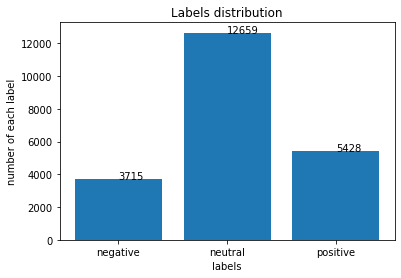

In [20]:
import matplotlib.pyplot as plt

labels = list(set(y_train))
num_label = []
for label in labels:
    num_label.append(y_train.count(label))
    
plt.bar(labels, num_label)
plt.title("Labels distribution")
for i in range(len(labels)):
    plt.text(x= labels[i] , y = num_label[i] , s=num_label[i])
plt.xlabel("labels")
plt.ylabel("number of each label")
plt.show()

In [21]:
#evaluation score
#compare macro and weighted in recall/precision/f1 score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def evaluation_scores(sub_test_y_set, sub_predict_y_set):
    accuracy = []
    precision_macro = []
    recall_macro = []
    f1_macro = []
    precision_weighted = []
    recall_weighted = []
    f1_weighted = []
    for i in range(len(sub_test_y_set)):
        a = accuracy_score(sub_test_y_set[i], sub_predict_y_set[i])
        accuracy.append(a)
        
        p_m = precision_score(sub_test_y_set[i], sub_predict_y_set[i], average = "macro")
        precision_macro.append(p_m)
        
        r_m = recall_score(sub_test_y_set[i], sub_predict_y_set[i], average = "macro")
        recall_macro.append(r_m)
        
        f1_m = f1_score(sub_test_y_set[i], sub_predict_y_set[i], average = "macro")
        f1_macro.append(f1_m)
        
        p_w = precision_score(sub_test_y_set[i], sub_predict_y_set[i], average = "weighted")
        precision_weighted.append(p_w)
        
        r_w = recall_score(sub_test_y_set[i], sub_predict_y_set[i], average = "weighted")
        recall_weighted.append(r_w)
        
        f1_w = f1_score(sub_test_y_set[i], sub_predict_y_set[i], average = "weighted")
        f1_weighted.append(f1_w)
    return np.mean(accuracy), np.mean(precision_macro), np.mean(recall_macro), np.mean(f1_macro), np.mean(precision_macro), np.mean(precision_weighted), np.mean(recall_weighted), np.mean(f1_weighted)

In [22]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
def confusion_matrix(method, sub_test_x_set, sub_test_y_set):
    for i in range(len(sub_test_x_set)):
        plot_confusion_matrix(method, sub_test_x_set[i], sub_test_y_set[i])
        plt.show()

In [23]:
#help to find best hyper parameter
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
def find_optimized_params(method, param_grid, sub_train_x_set, sub_train_y_set):
    best_para = []
    search = HalvingGridSearchCV(estimator=method, param_grid=param_grid)
    for i in range(len(sub_train_x_set)):
        model = search.fit(sub_train_x_set[i], sub_train_y_set[i])
        best_para.append(model.best_params_)
    return best_para



In [24]:
#if need to see the processing, please uncomment the code below

#from sklearn.svm import SVC
#param_grid = {"kernel": ("linear", "poly", "rbf", "sigmoid"), "degree":[1,10], "C": [1,20], "decision_function_shape": ("ovo","ovr")}
#print(find_optimized_params(SVC(), param_grid, sub_train_x_set, sub_train_y_set))

#result of SVC
#[{'C': 1, 'decision_function_shape': 'ovo', 'degree': 10, 'kernel': 'linear'}
#{'C': 1, 'decision_function_shape': 'ovo', 'degree': 10, 'kernel': 'sigmoid'}
#{'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'sigmoid'} *
#{'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'sigmoid'}]

#result of balanced svc k = 2000
#[{'C': 1, 'decision_function_shape': 'ovr', 'degree': 10, 'kernel': 'sigmoid'}, 
#{'C': 20, 'decision_function_shape': 'ovr', 'degree': 10, 'kernel': 'rbf'}, 
#{'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'sigmoid'}, 
#{'C': 20, 'decision_function_shape': 'ovo', 'degree': 10, 'kernel': 'rbf'}]

#result of balanced svc k=1000

In [25]:
from collections import Counter
def majority_vote(real_test_set_predict):
    test_predict = []
    test_length = len(real_test_set_predict[0])
    for i in range(test_length):
        vote = Counter([real_test_set_predict[0][i], real_test_set_predict[1][i], real_test_set_predict[2][i], real_test_set_predict[3][i]])
        top_one = vote.most_common(1)
        test_predict.append(top_one[0][0])
    return test_predict

In [26]:
#SVM model
#parameter-we use majority vote to determin the model hyper parameter
#accuary -- as for accuracy, each fold will got an accuracy score based on the model and selected featrues
# as for the model performance we just use the mean of the accuracies
# as for predict the test set, based on the cv, features might have some differences in each fold
# so we collect the predict result of test data under each fold's svc model
# then we use majority vote to find the predicted label of each tweet

from sklearn.svm import SVC

SVM = SVC(kernel = "rbf", C = 1, degree = 10, decision_function_shape = "ovr")
sub_predict_y_set = []
training_accuracy = []
real_test_set_predict = []
for i in range(len(sub_train_x_set)):
    model = SVM.fit(sub_train_x_set[i], sub_train_y_set[i])
    y_train_predict = SVM.predict(sub_train_x_set[i])
    training_accuracy.append(accuracy_score(sub_train_y_set[i], y_train_predict))
    y_test_predict = SVM.predict(sub_test_x_set[i])
    sub_predict_y_set.append(y_test_predict)
    real_test_predict = SVM.predict(real_x_test_set[i])
    real_test_set_predict.append(real_test_predict)
training_accuracy = np.mean(training_accuracy)


In [27]:
#in order to produce a csv file

#test_label = majority_vote(real_test_set_predict)
#final_result = pd.DataFrame({"id": X_test_id, "sentiment": test_label})
#final_result.to_csv("predicted.csv", index = False)

In [28]:
#SVM evaluation result
accuracy, precision_macro, recall_macro, f1_macro, precision_macro, precision_weighted, recall_weighted, f1_weighted =  evaluation_scores(sub_test_y_set, sub_predict_y_set)
acc1 = pd.DataFrame({"svm training accuracy": training_accuracy, "svm testing accuracy": accuracy}, index =["avg"])
evaluation1 = pd.DataFrame({ "svm precision score": [precision_macro, precision_weighted], "svm recall score": [recall_macro, recall_weighted], "svm f1 score": [f1_macro, f1_weighted]}, index = ["macro","weighted"])
print(acc1)
print(evaluation1)

     svm training accuracy  svm testing accuracy
avg               0.913503              0.625117
          svm precision score  svm recall score  svm f1 score
macro                0.621538          0.625117      0.622871
weighted             0.621538          0.625117      0.622871


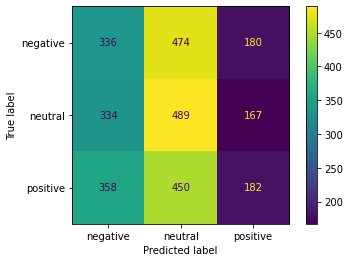

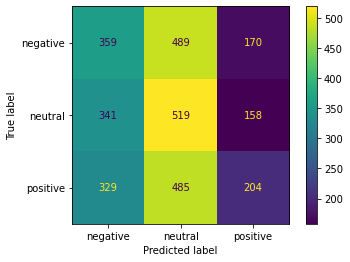

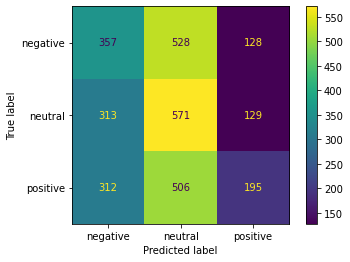

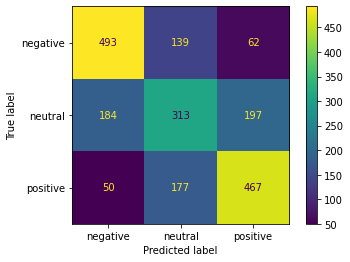

In [29]:
#print confusion matrix of SVM
confusion_matrix(SVM, sub_test_x_set, sub_test_y_set)

In [30]:
#find best parameter for Random Forest, uncomment the code below to see the processing

#uncomment to see the processing
#from sklearn.ensemble import RandomForestClassifier
#param_grid = {"criterion": ("gini","entropy"), "max_features": ("auto","sqrt","log2"), "class_weight": ("balanced","balanced_subsample")}
#print(find_optimized_params(RandomForestClassifier(), param_grid, sub_train_x_set, sub_train_y_set))

#result of rf
#[{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto'}, 
#{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2'}, 
#{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2'}, 
#{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2'}]

#result of balanced rf
#[{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2'}, 
#{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2'}, 
#{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'log2'}, 
#{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2'}]

In [31]:
#random forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight = "balanced", criterion = "gini", max_features = "log2")
sub_predict_y_set = []
training_accuracy = []
real_test_set_predict = []
for i in range(len(sub_train_x_set)):
    model = RF.fit(sub_train_x_set[i], sub_train_y_set[i])
    y_train_predict = RF.predict(sub_train_x_set[i])
    training_accuracy.append(accuracy_score(sub_train_y_set[i], y_train_predict))
    y_test_predict = RF.predict(sub_test_x_set[i])
    sub_predict_y_set.append(y_test_predict)
    real_test_predict = RF.predict(real_x_test_set[i])
    real_test_set_predict.append(real_test_predict)
training_accuracy = np.mean(training_accuracy)    

In [32]:
#produce csv file for rf

#test_label = majority_vote(real_test_set_predict)
#final_result = pd.DataFrame({"id": X_test_id, "sentiment": test_label})
#final_result.to_csv("rf_predicted.csv", index = False)

In [33]:
#RF evaluation result
accuracy, precision_macro, recall_macro, f1_macro, precision_macro, precision_weighted, recall_weighted, f1_weighted =  evaluation_scores(sub_test_y_set, sub_predict_y_set)
acc = pd.DataFrame({"rf training accuracy": training_accuracy, "rf testing accuracy": accuracy}, index =["avg"])
evaluation = pd.DataFrame({ "rf precision score": [precision_macro, precision_weighted], "rf recall score": [recall_macro, recall_weighted], "rf f1 score": [f1_macro, f1_weighted]}, index = ["macro","weighted"])
print(acc)
print(evaluation)

     rf training accuracy  rf testing accuracy
avg              0.999376             0.611079
          rf precision score  rf recall score  rf f1 score
macro               0.606975         0.611079     0.608164
weighted            0.606975         0.611079     0.608164


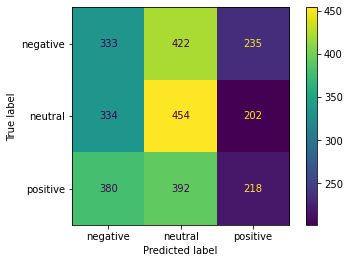

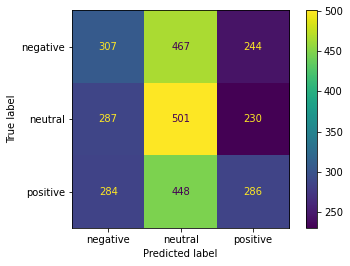

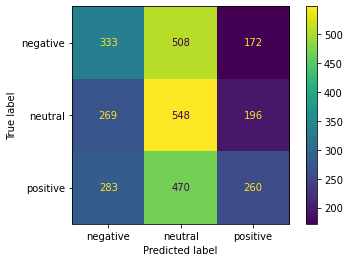

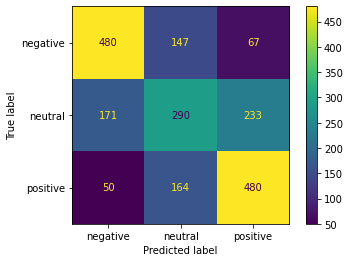

In [34]:
#print confusion matrix of RF
confusion_matrix(RF, sub_test_x_set, sub_test_y_set)